Military Power Clustering

The aim of this project is to cluster countries based on their military power.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_excel('World military power.xlsx')

In [5]:
df.head(5)

,2020 ranking,Unnamed: 1,Airforce Strength,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Geography,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
2,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
3,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
4,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369


In [6]:
#I fix column names.
df.columns = df.iloc[0]
df = df.drop(0)

In [7]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,...,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
1,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
2,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,...,Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
3,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
4,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369
5,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968


In [8]:
#I am removing duplicate columns.
columns = df.columns[2:60:2]
df = df.drop(columns=columns)

In [9]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
1,Afghanistan,1.3444,260,0,25,30,0,187,0,0,...,43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987
2,Albania,2.3137,19,0,0,0,0,19,0,0,...,4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691
3,Algeria,0.4659,551,103,22,59,87,257,45,880,...,157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734
4,Angola,0.8379,295,72,18,30,47,126,15,379,...,176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369
5,Argentina,0.6521,227,24,7,9,64,100,0,370,...,1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Military Strength                        138 non-null    object
 1   Military Strength Power Index            138 non-null    object
 2   Aircraft Strength value                  138 non-null    object
 3   Fighter/Interceptor Strength value       138 non-null    object
 4   Attack Aircraft Strength value           138 non-null    object
 5   Transport Aircraft Fleet Strength value  138 non-null    object
 6   Trainer Aircraft Fleet value             138 non-null    object
 7   Helicopter Fleet Strength value          138 non-null    object
 8   Attack Helicopter Fleet Strength value   138 non-null    object
 9   Tank Strength value                      138 non-null    object
 10  AFV/APC Strength value                   138 non-null    objec

In [11]:
df.describe()

,Military Strength,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
count,138,138.0000,138,138,138,138,138,138,138,138,...,138,138,138,138,138,138,138,109,138,129
unique,138,138.0000,113,63,38,49,77,97,45,106,...,108,88,102,84,138,138,138,104,92,125
top,Afghanistan,1.3444,19,0,0,0,0,5,0,0,...,18,0,18500,0,"1,43,25,743","3,49,40,837","6,52,230",853,0,443
freq,1,1.0000,5,46,75,15,25,4,63,24,...,3,46,4,46,1,1,1,2,38,2


In [12]:
df.shape

(138, 31)

In [13]:
df.isnull().sum()

0
Military Strength                           0
Military Strength Power Index               0
Aircraft Strength value                     0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value              0
Transport Aircraft Fleet Strength value     0
Trainer Aircraft Fleet value                0
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Tank Strength value                         0
AFV/APC Strength value                      0
Self-Propelled Artillery Strength value     0
Towed Artillery Strength value              0
Rocket Projector Strength value             0
Navy Fleet Strengths value                 14
Aircraft Carrier Fleet Strength value      23
Submarine Fleet Strength value             23
Destroyer Fleet Strength value             23
Frigate Fleet Strength value               23
defense spending budget value               0
External Debt value                         0
Airport Totals value            

In [14]:
df.shape

(138, 31)

In [15]:
df.rename(columns={'Military Strength': 'Country'}, inplace=True)

In [16]:
df['Oil Production value'].value_counts()

Oil Production value
0            46
14000         3
2000          3
1000          2
16,18,000     1
             ..
43410         1
400           1
1,98,800      1
15170         1
12260         1
Name: count, Length: 88, dtype: int64

In [17]:
df.groupby("Navy Fleet Strengths value")['Aircraft Strength value'].value_counts()

Navy Fleet Strengths value  Aircraft Strength value
0                           19                         2
                            0                          1
                            2                          1
                            260                        1
                            202                        1
                                                      ..
453                         469                        1
490                         13264                      1
603                         4163                       1
777                         3210                       1
984                         949                        1
Name: count, Length: 123, dtype: int64

In [18]:
df.fillna(df.mode().iloc[0], inplace=True)

In [19]:
df.isnull().sum()

0
Country                                    0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Prod

In [20]:
df['Oil Production value']

1              0
2          16000
3      13,06,000
4      16,66,000
5       4,79,400
         ...    
134    20,07,000
135     2,71,400
136        12260
137            0
138            0
Name: Oil Production value, Length: 138, dtype: object

In [21]:
df = df.replace(',', '', regex=True)

In [22]:
df['Oil Production value']

1            0
2        16000
3      1306000
4      1666000
5       479400
        ...   
134    2007000
135     271400
136      12260
137          0
138          0
Name: Oil Production value, Length: 138, dtype: object

In [23]:
for column in df.columns[1:]:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [24]:
df.isnull().sum()

0
Country                                    0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Prod

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

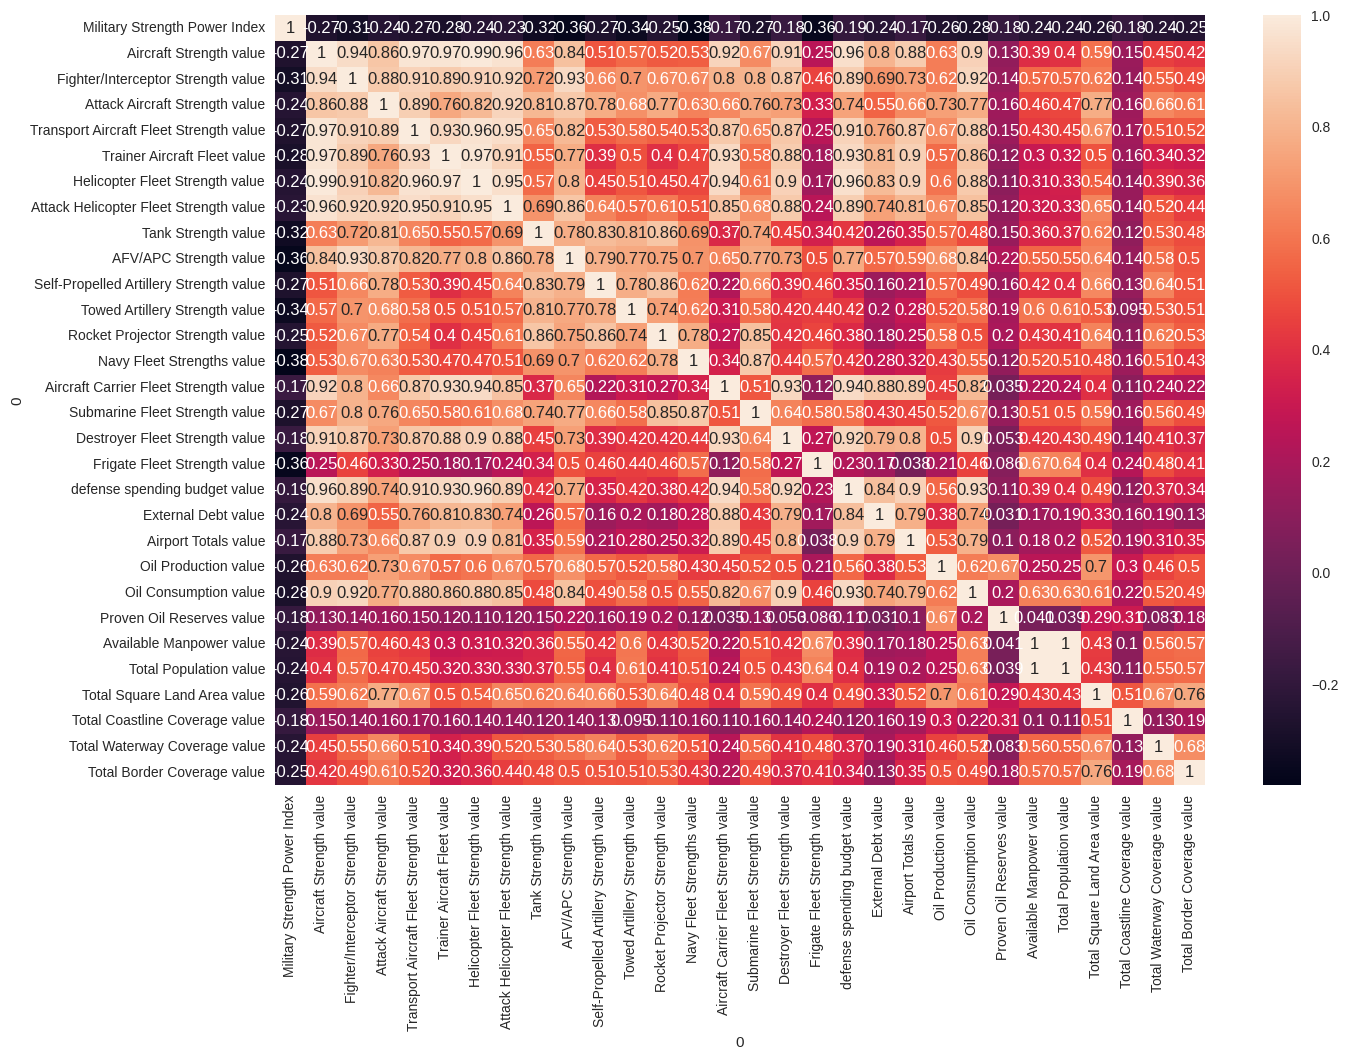

In [26]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True);

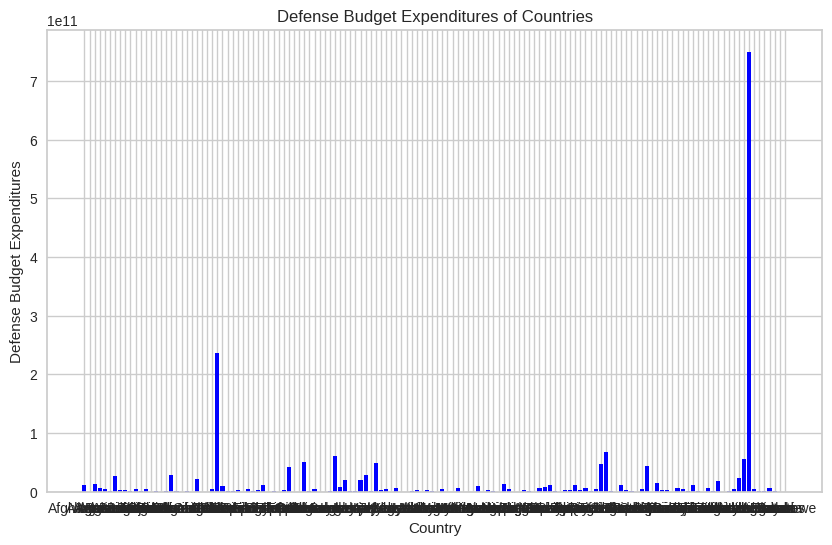

In [27]:
#Graph 1: Defense Budget Expenditures (Bar Chart)
plt.figure(figsize=(10, 6))
plt.bar(df['Country'], df['defense spending budget value'], color='blue')
plt.xlabel('Country')
plt.ylabel('Defense Budget Expenditures')
plt.title('Defense Budget Expenditures of Countries')
plt.show()

In [28]:
x=df.drop(['Country','Oil Production value','Proven Oil Reserves value','Available Manpower value','Total Population value','Total Square Land Area value','Total Coastline Coverage value','Total Waterway Coverage value','Total Border Coverage value'],axis=1)

In [29]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Military Strength Power Index            138 non-null    float64
 1   Aircraft Strength value                  138 non-null    int64  
 2   Fighter/Interceptor Strength value       138 non-null    int64  
 3   Attack Aircraft Strength value           138 non-null    int64  
 4   Transport Aircraft Fleet Strength value  138 non-null    int64  
 5   Trainer Aircraft Fleet value             138 non-null    int64  
 6   Helicopter Fleet Strength value          138 non-null    int64  
 7   Attack Helicopter Fleet Strength value   138 non-null    int64  
 8   Tank Strength value                      138 non-null    int64  
 9   AFV/APC Strength value                   138 non-null    int64  
 10  Self-Propelled Artillery Strength value  138 non-n

In [30]:
from sklearn.cluster import KMeans
model = KMeans(4)
model.fit(x)
prediction = model.predict(x)

In [31]:
silhouette_score(x,prediction)

0.8725961216672268

In [32]:
df['Cluster']= prediction

In [33]:
# wccs= withhin cluster sum of squares
wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    prediction=model.predict(x)
    ss1=silhouette_score(x,prediction)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.9237463501153025
0.9013975871172537
0.8725961216672268
0.8729752649974876
0.7986344412067882
0.8033956214903065
0.8070858199887637
0.8033122011927148


In [34]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(i);
    kmeans.fit(x);
    wcss.append(kmeans.inertia_);

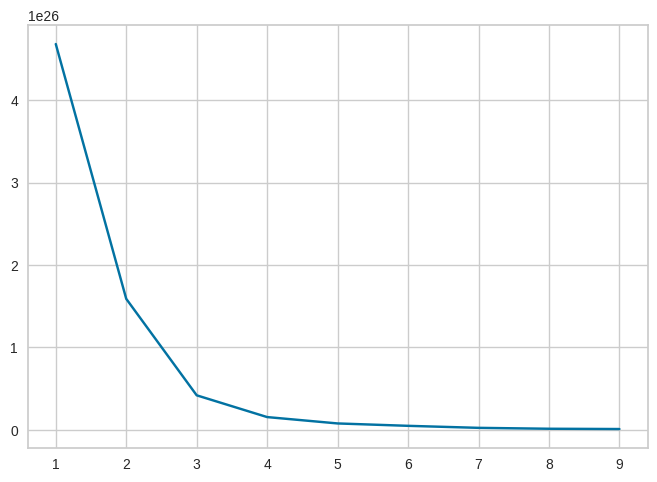

In [35]:
plt.plot(range(1,10),wcss)

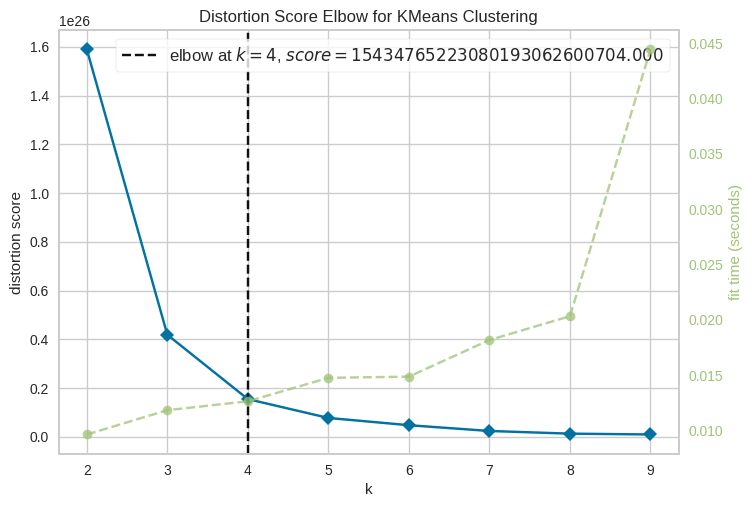

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
km=KMeans()
visualizer=KElbowVisualizer(km,k=(2,10))
visualizer.fit(x)
visualizer.show()

In [37]:
data = linkage(x, method='ward', metric='euclidean')  # Ward optimization, Euclidean distance measurement

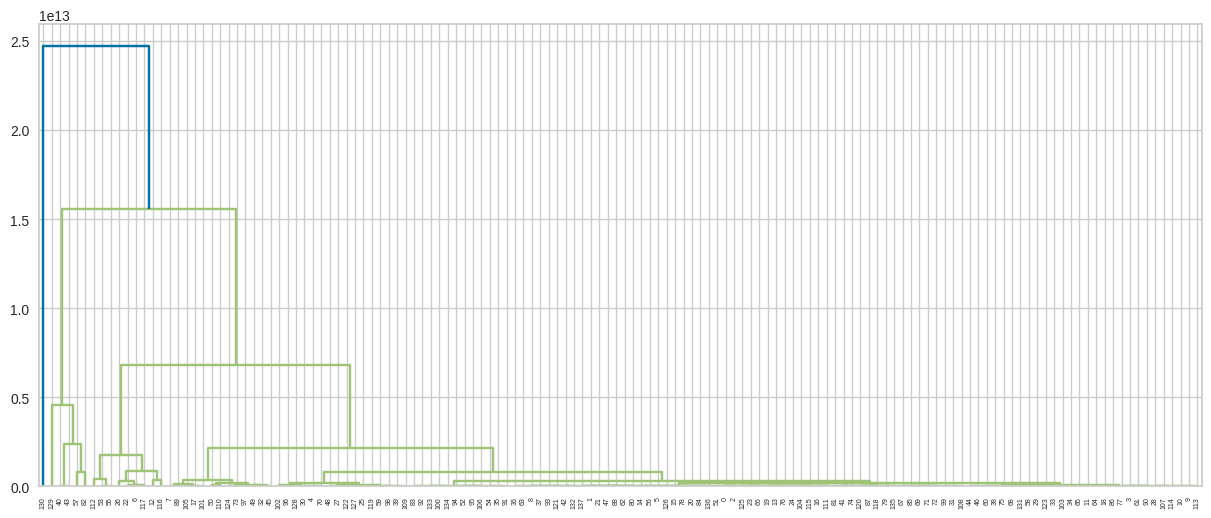

In [38]:
plt.figure(figsize=(15,6))
dendrogram(data);

In [39]:
df.sample(10)

,Country,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,...,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Cluster
53,Iraq,0.7911,348,26,33,16,102,186,40,309,...,4454000,825000,142500000000,16399240,40194216,438317,58,5279,3809,1
63,Kyrgyzstan,1.9244,5,0,0,0,0,5,2,150,...,1000,17200,40000000,3029935,5849296,199951,26,600,4573,1
129,United Arab Emirates,0.7034,538,98,20,40,145,229,30,434,...,3174000,575000,97800000000,5820789,9701315,83600,1318,0,1066,1
68,Libya,1.3696,114,17,2,4,62,26,7,250,...,897100,315000,48360000000,3552871,6754507,1759540,1770,0,4339,1
136,Yemen,1.2412,169,77,0,8,21,61,14,620,...,12260,145000,3000000000,11266221,28667230,527968,1906,0,1601,1
92,Pakistan,0.2364,1372,356,90,49,513,346,56,2200,...,89720,575000,350600000,96344277,207862518,796095,1046,25220,7257,1
115,Sudan,1.3017,190,46,38,22,11,73,43,690,...,102300,96800,5000000000,24061430,43120843,1861484,853,1723,6819,1
87,Nigeria,0.6485,129,8,13,21,47,44,15,253,...,1946000,275000,37060000000,77108499,203452505,923768,853,8600,4477,1
1,Afghanistan,1.3444,260,0,25,30,0,187,0,0,...,0,5500,0,14325743,34940837,652230,0,1200,5987,1
34,Dominican Republic,2.7504,49,0,8,10,4,28,0,6,...,0,125000,0,4819818,10298756,48320,1288,350,376,1


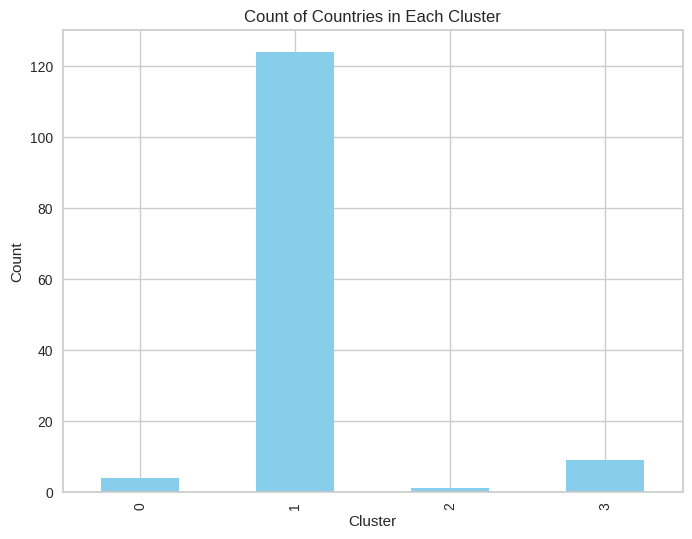

In [40]:
cluster_counts = df['Cluster'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Count of Countries in Each Cluster')

# Show the bar chart
plt.show()

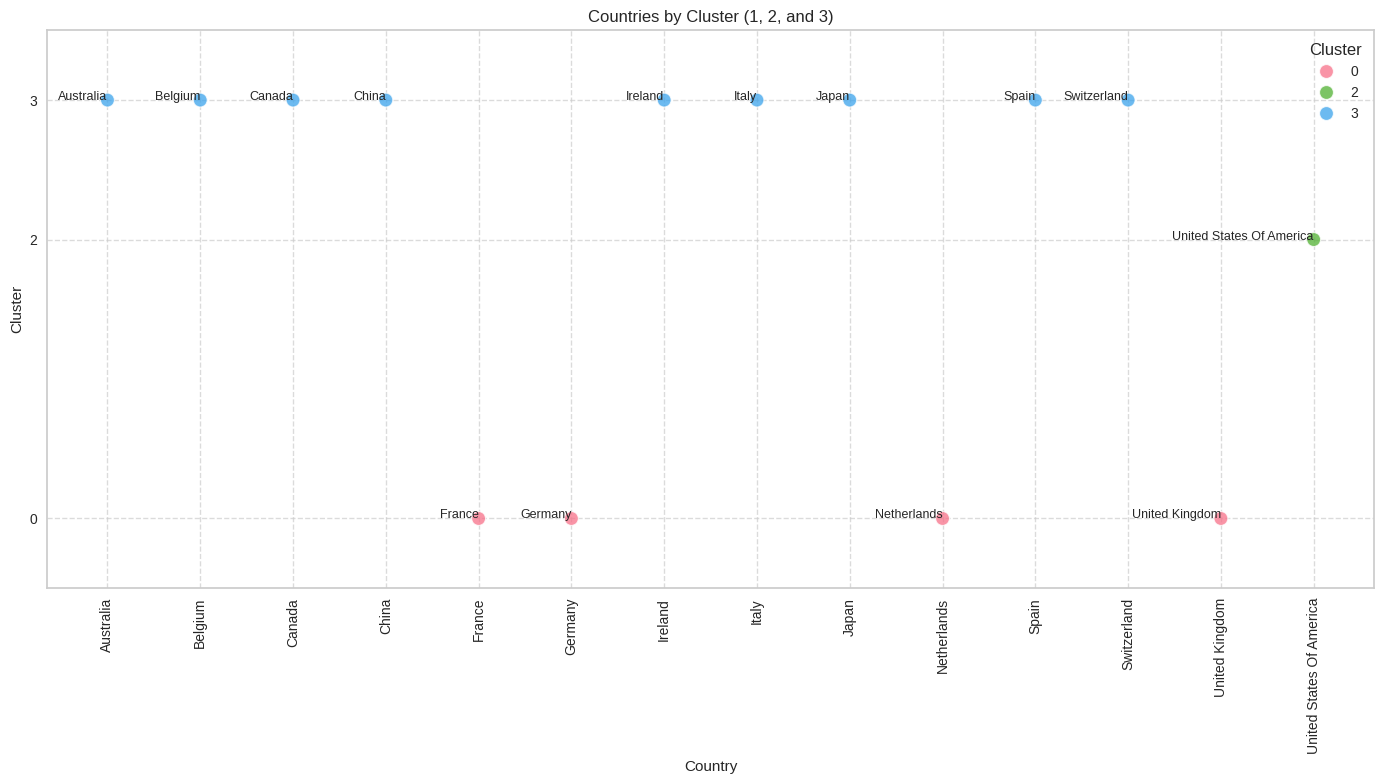

In [48]:
# Filter the DataFrame to include only clusters 0, 2, and 3
filtered_df = df[df['Cluster'].isin([0, 2, 3])]

# Set the color palette for clusters
palette = sns.color_palette("husl", n_colors=len(filtered_df['Cluster'].unique()))

# Create an enhanced scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(data=filtered_df, x='Country', y='Cluster', hue='Cluster', palette=palette, s=100, edgecolor='w', alpha=0.75)

# Add data labels
for i, row in filtered_df.iterrows():
    plt.text(row['Country'], row['Cluster'], row['Country'], fontsize=9, ha='right')

# Set y-axis limits and ticks to show only whole numbers (0, 2, 3)
plt.yticks([0, 2, 3])
plt.ylim(-0.5, 3.5)

plt.xlabel('Country')
plt.ylabel('Cluster')
plt.title('Countries by Cluster (1, 2, and 3)')
plt.xticks(rotation=90)
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.7)

# Show the scatter plot
plt.tight_layout()
plt.show()

In [42]:
df['Country']=df['Country'].replace('United States','United States of America')

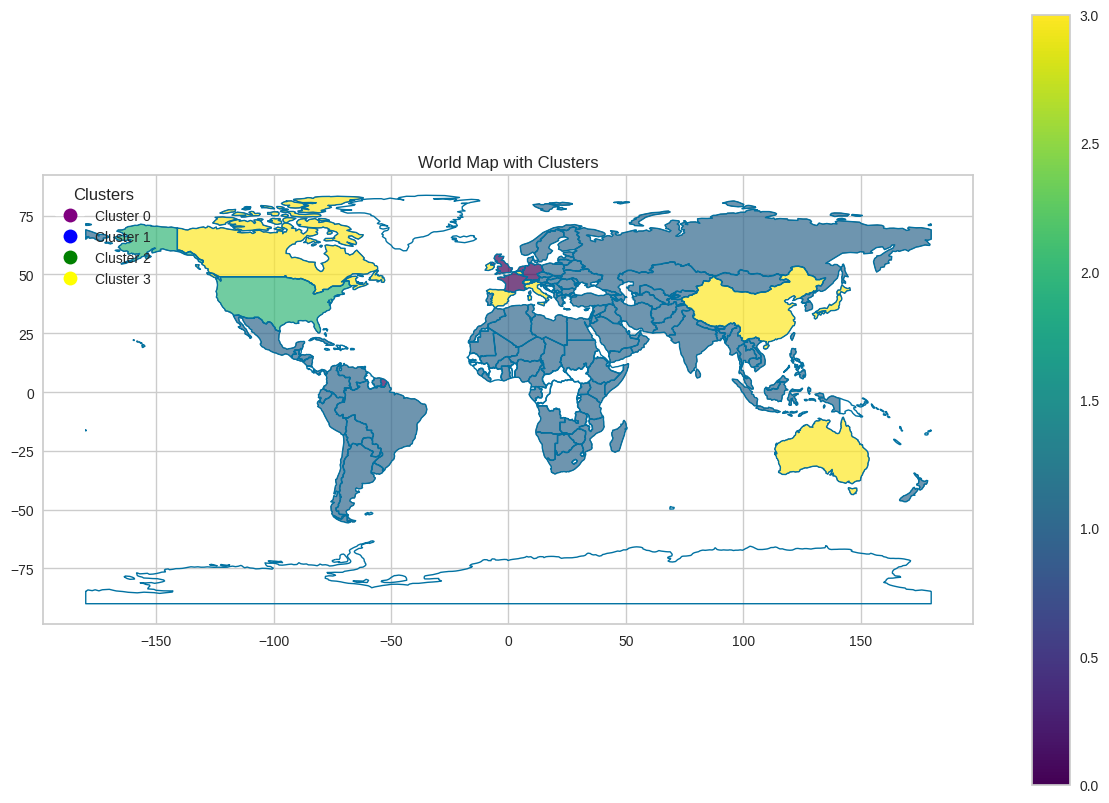

In [43]:
import geopandas as gpd
from matplotlib.lines import Line2D
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the cluster data
# Normalize the 'Country' column for merging
df['Country'] = df['Country'].str.title()
world['name'] = world['name'].str.title()

# Merge datasets
world_data = world.merge(df, left_on='name', right_on='Country', how='left')

# Create a color palette for clusters
palette = {0: 'purple', 1: 'blue', 2: 'green', 3: 'yellow'}

# Plot the world map with clusters
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_data.boundary.plot(ax=ax, linewidth=1)
world_data.plot(column='Cluster', ax=ax, legend=True, cmap='viridis', edgecolor='black', linewidth=0.5, alpha=0.7)

# Create a custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Cluster 0'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Cluster 1'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Cluster 2'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Cluster 3')
]
ax.legend(handles=legend_elements, title='Clusters', loc='upper left')

plt.title('World Map with Clusters')
plt.show()

In [43]:
#As observed from the clustering process, the United States stands out distinctly from other countries in terms of military power.
# We have four different clusters, and these clusters are clearly represented through data visualization.